In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score


In [2]:
df = pd.read_csv("student_scores.csv")
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.columns


Index(['Hours', 'Scores'], dtype='str')

In [9]:
df["result"] = (df["Scores"] >= 40).astype(int)
df.head()


,Hours,Scores,result
0,2.5,21,0
1,5.1,47,1
2,3.2,27,0
3,8.5,75,1
4,3.5,30,0


In [10]:
X = df[["Hours"]]
y = df["result"]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

log_pred = log_model.predict(X_test_scaled)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("F1 Score:", f1_score(y_test, log_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))


Logistic Regression
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[2 0]
 [0 3]]


In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

knn_pred = knn_model.predict(X_test_scaled)

print("KNN")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("F1 Score:", f1_score(y_test, knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))


KNN
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[2 0]
 [0 3]]


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


Random Forest
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[2 0]
 [0 3]]


In [16]:
import numpy as np

np.random.seed(42)

# Attendance (between 60–100, correlated with Hours)
df["Attendance"] = (df["Hours"] * 5 + np.random.randint(40, 60, len(df))).clip(60, 100)

# Previous Score (slightly lower than current score with noise)
df["Previous_Score"] = (df["Scores"] - np.random.randint(5, 15, len(df))).clip(0, 100)

# Assignments score (based on hours studied)
df["Assignments"] = (df["Hours"] * 8 + np.random.randint(10, 20, len(df))).clip(0, 100)

df.head()


,Hours,Scores,result,Attendance,Previous_Score,Assignments
0,2.5,21,0,60.0,10,31.0
1,5.1,47,1,84.5,39,57.8
2,3.2,27,0,70.0,14,38.6
3,8.5,75,1,92.5,68,79.0
4,3.5,30,0,64.5,21,43.0


In [17]:
X = df[["Hours", "Attendance", "Previous_Score", "Assignments"]]
y = df["result"]


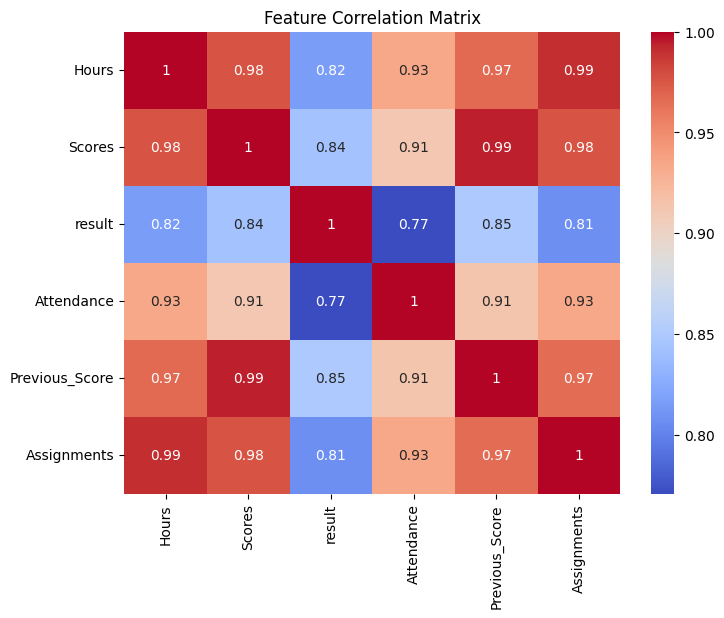

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()
